# Image compression through Singular Value Decomposition

Load a picture as a 3-dimensional `np.array`

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [8, 8]

# write here the import path of the image
image_path = 'data\TarantulaNebula.jpg'
'''
A picture in a computer is represented as a matrix, where each element is a pixel.
actually it is a little bit more complex because instead of having a matrix, 
we have 3 matrices, one for each channel (red, green, blue)
To simplify we consider a grayscale matrix.
The picture corresponds to the matrix A and we want to compress it
'''

A = imread(image_path) #matrix A that now contains the image

Visualize the picture

(-0.5, 629.5, 566.5, -0.5)

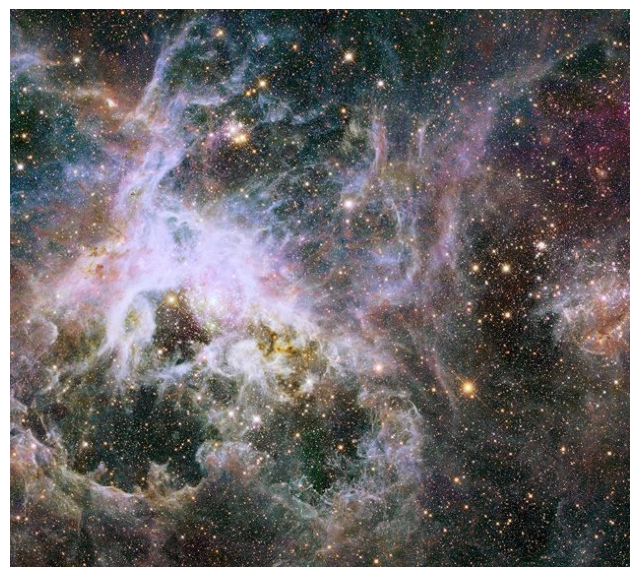

In [3]:
img = plt.imshow(A)
plt.axis('off')

Convert the picture to gray-scale and visualize it.

'\nin the third axis you have the intensity of red, green and blue\nIf you want to have the overall intensity, what can we do?\nA linear combination. In particular, typically the average or the sum. OK. For instance, we can do the \naverage.\n'

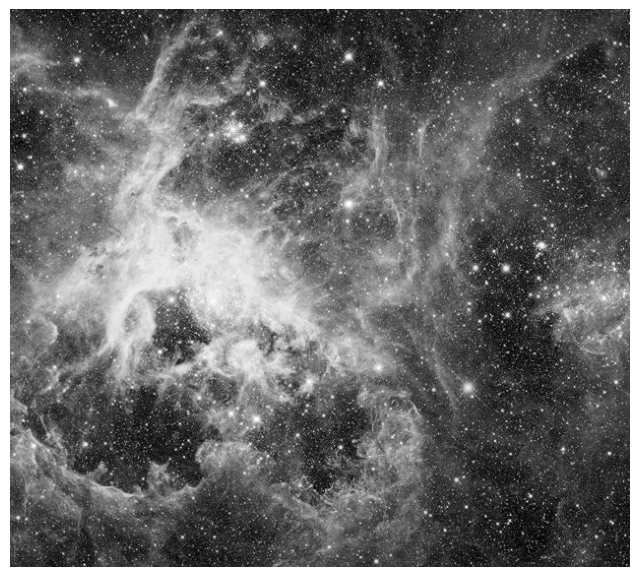

In [36]:
X = np.mean(A, axis = 2)
img = plt.imshow(X)
plt.axis('off')
img.set_cmap('gray') #because matplotlib is using a color map that map values from zero to 10% to 100%
#we need to change the color map, just for visualization purposes
'''
in the third axis you have the intensity of red, green and blue
If you want to have the overall intensity, what can we do?
A linear combination. In particular, typically the average or the sum. OK. For instance, we can do the 
average.
'''

What is the picture size?

In [5]:
X.shape

(567, 630)

Perform the SVD decomposition

In [37]:
U,s,VT = np.linalg.svd(X,full_matrices=False)

Plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

Text(0.5, 1.0, 'explained variance')

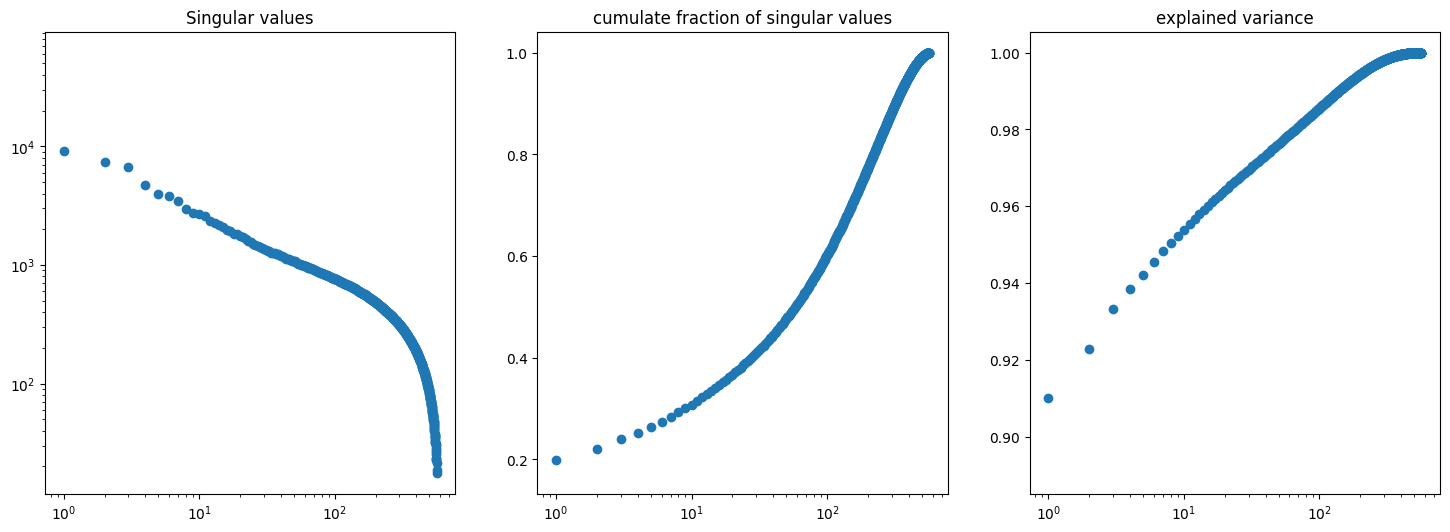

In [38]:
fig,axs = plt.subplots(1,3,figsize = (18,6))
 
# singular values
axs[0].loglog(s,'o')
axs[0].set_title("Singular values")

# cumulative fraction of singular values
axs[1].semilogx(np.cumsum(s) / np.sum(s),'o')
axs[1].set_title("cumulate fraction of singular values")

# explained variance
axs[2].semilogx(np.cumsum(s**2) / np.sum(s**2),'o')
axs[2].set_title("explained variance")


Visualize the best rank-$k$ matrices, for $k$ = 1, 5, 10, 50, 100, 500

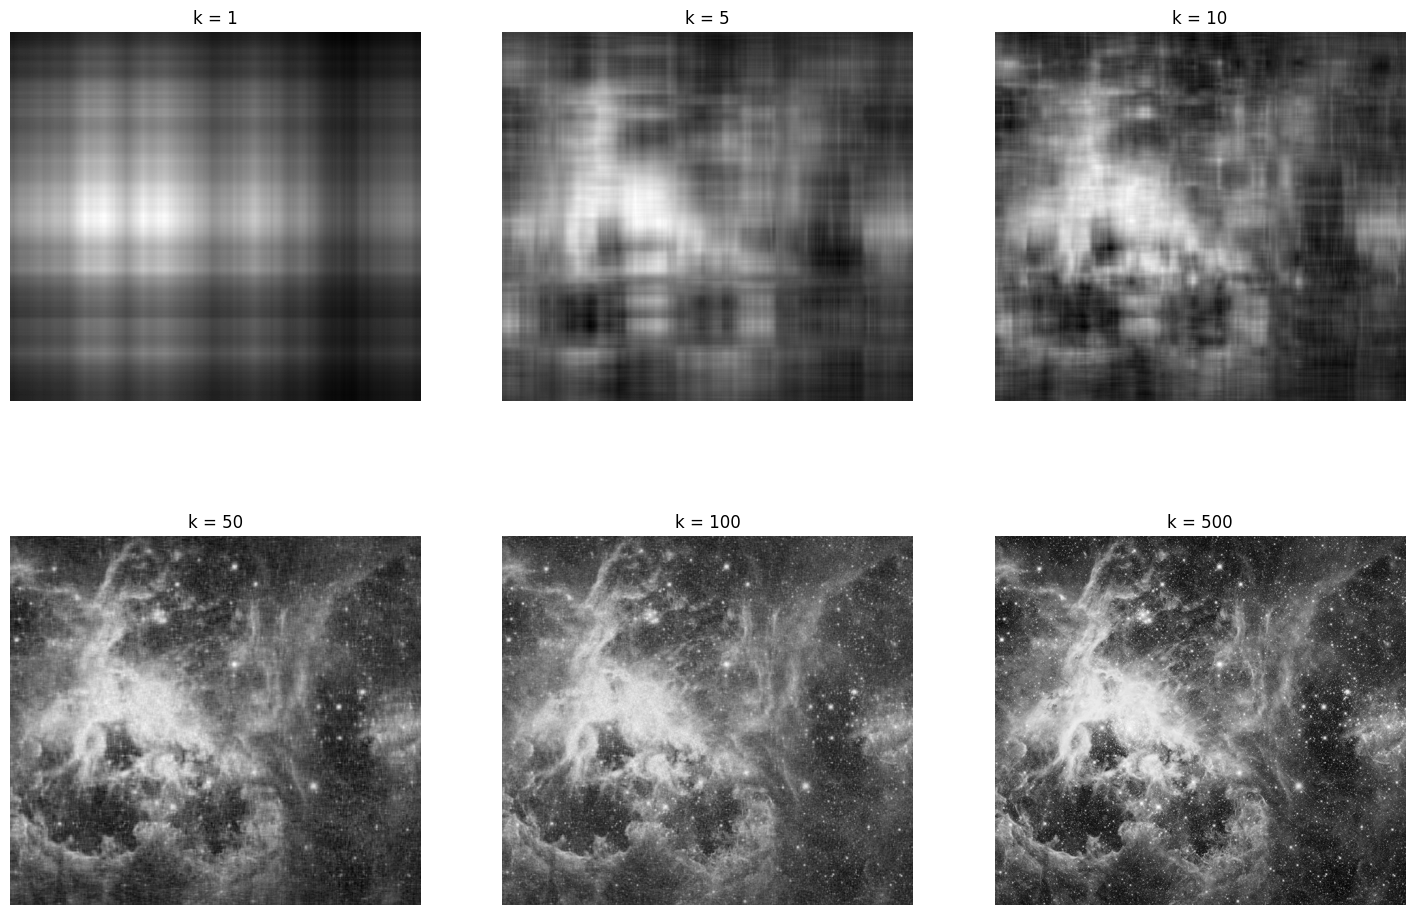

In [9]:
# Numero di valori singolari da considerare
idxs = [1, 5, 10, 50, 100, 500]

# Creazione di una griglia di subplot con 2 righe e 3 colonne
# e specifica delle dimensioni della figura
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Appiattimento della matrice di assi per semplificare l'iterazione
axs = axs.flatten() #perché era un array di 2 dimensioni e noi si trasforma in una dimensione
# axs.flatten() restituisce a sua volta un array
plt.set_cmap('gray')  # Impostazione della mappa dei colori in scala di grigi

# Iterazione su ogni indice specificato
for i in range(len(idxs)):
    k = idxs[i]  # Numero di componenti da considerare
    # Ricostruzione dell'immagine utilizzando solo i primi k valori singolari
    Xk = U[:, :k] @ np.diag(s[:k]) @ VT[:k, :]
    #da un vettore o estrarre la diagonale principale da una matrice
    
    # Visualizzazione dell'immagine ricostruita
    axs[i].imshow(Xk)
    axs[i].set_title('k = %d' % k)  # Impostazione del titolo del subplot
    axs[i].axis('off')  # Rimozione degli assi
    

# Visualizzazione della figura
plt.show()

Visualize the $k$-th rank-1 matix, for $k$ = 1,2,...,6

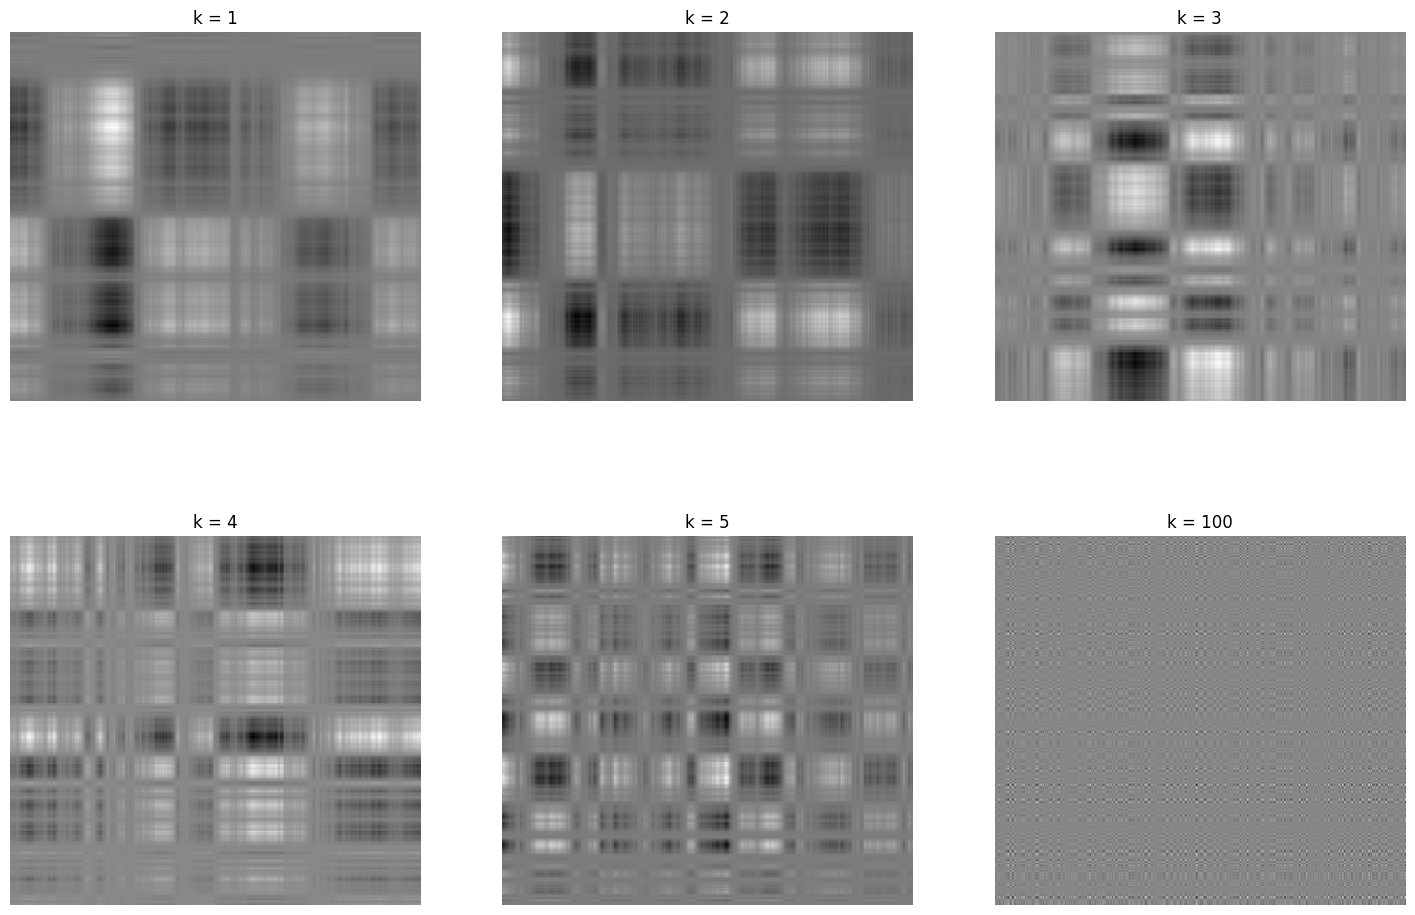

In [10]:
# Numero di valori singolari da considerare
idxs = [1, 2, 3, 4, 5, 100]

# Creazione di una griglia di subplot con 2 righe e 3 colonne
# e specifica delle dimensioni della figura
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Appiattimento della matrice di assi per semplificare l'iterazione
axs = axs.flatten() #perché era un array di 2 dimensioni e noi si trasforma in una dimensione
# axs.flatten() restituisce a sua volta un array

plt.set_cmap('gray')  # Impostazione della mappa dei colori in scala di grigi
# Iterazione su ogni indice specificato
for i in range(len(idxs)):
    k = idxs[i]  # Numero di componenti da considerare
    # Ricostruzione dell'immagine utilizzando solo i primi k valori singolari
    Xk = np.outer(U[:,k], VT[k,:] )
    #da un vettore o estrarre la diagonale principale da una matrice
    
    # Visualizzazione dell'immagine ricostruita
    axs[i].imshow(Xk)
    axs[i].set_title('k = %d' % k)  # Impostazione del titolo del subplot
    axs[i].axis('off')  # Rimozione degli assi
    

# Visualizzazione della figura
plt.show()

Visualize the Cumulative sum of the $k$-th rank-1 matrices, for $k$ = 1,2,...,20

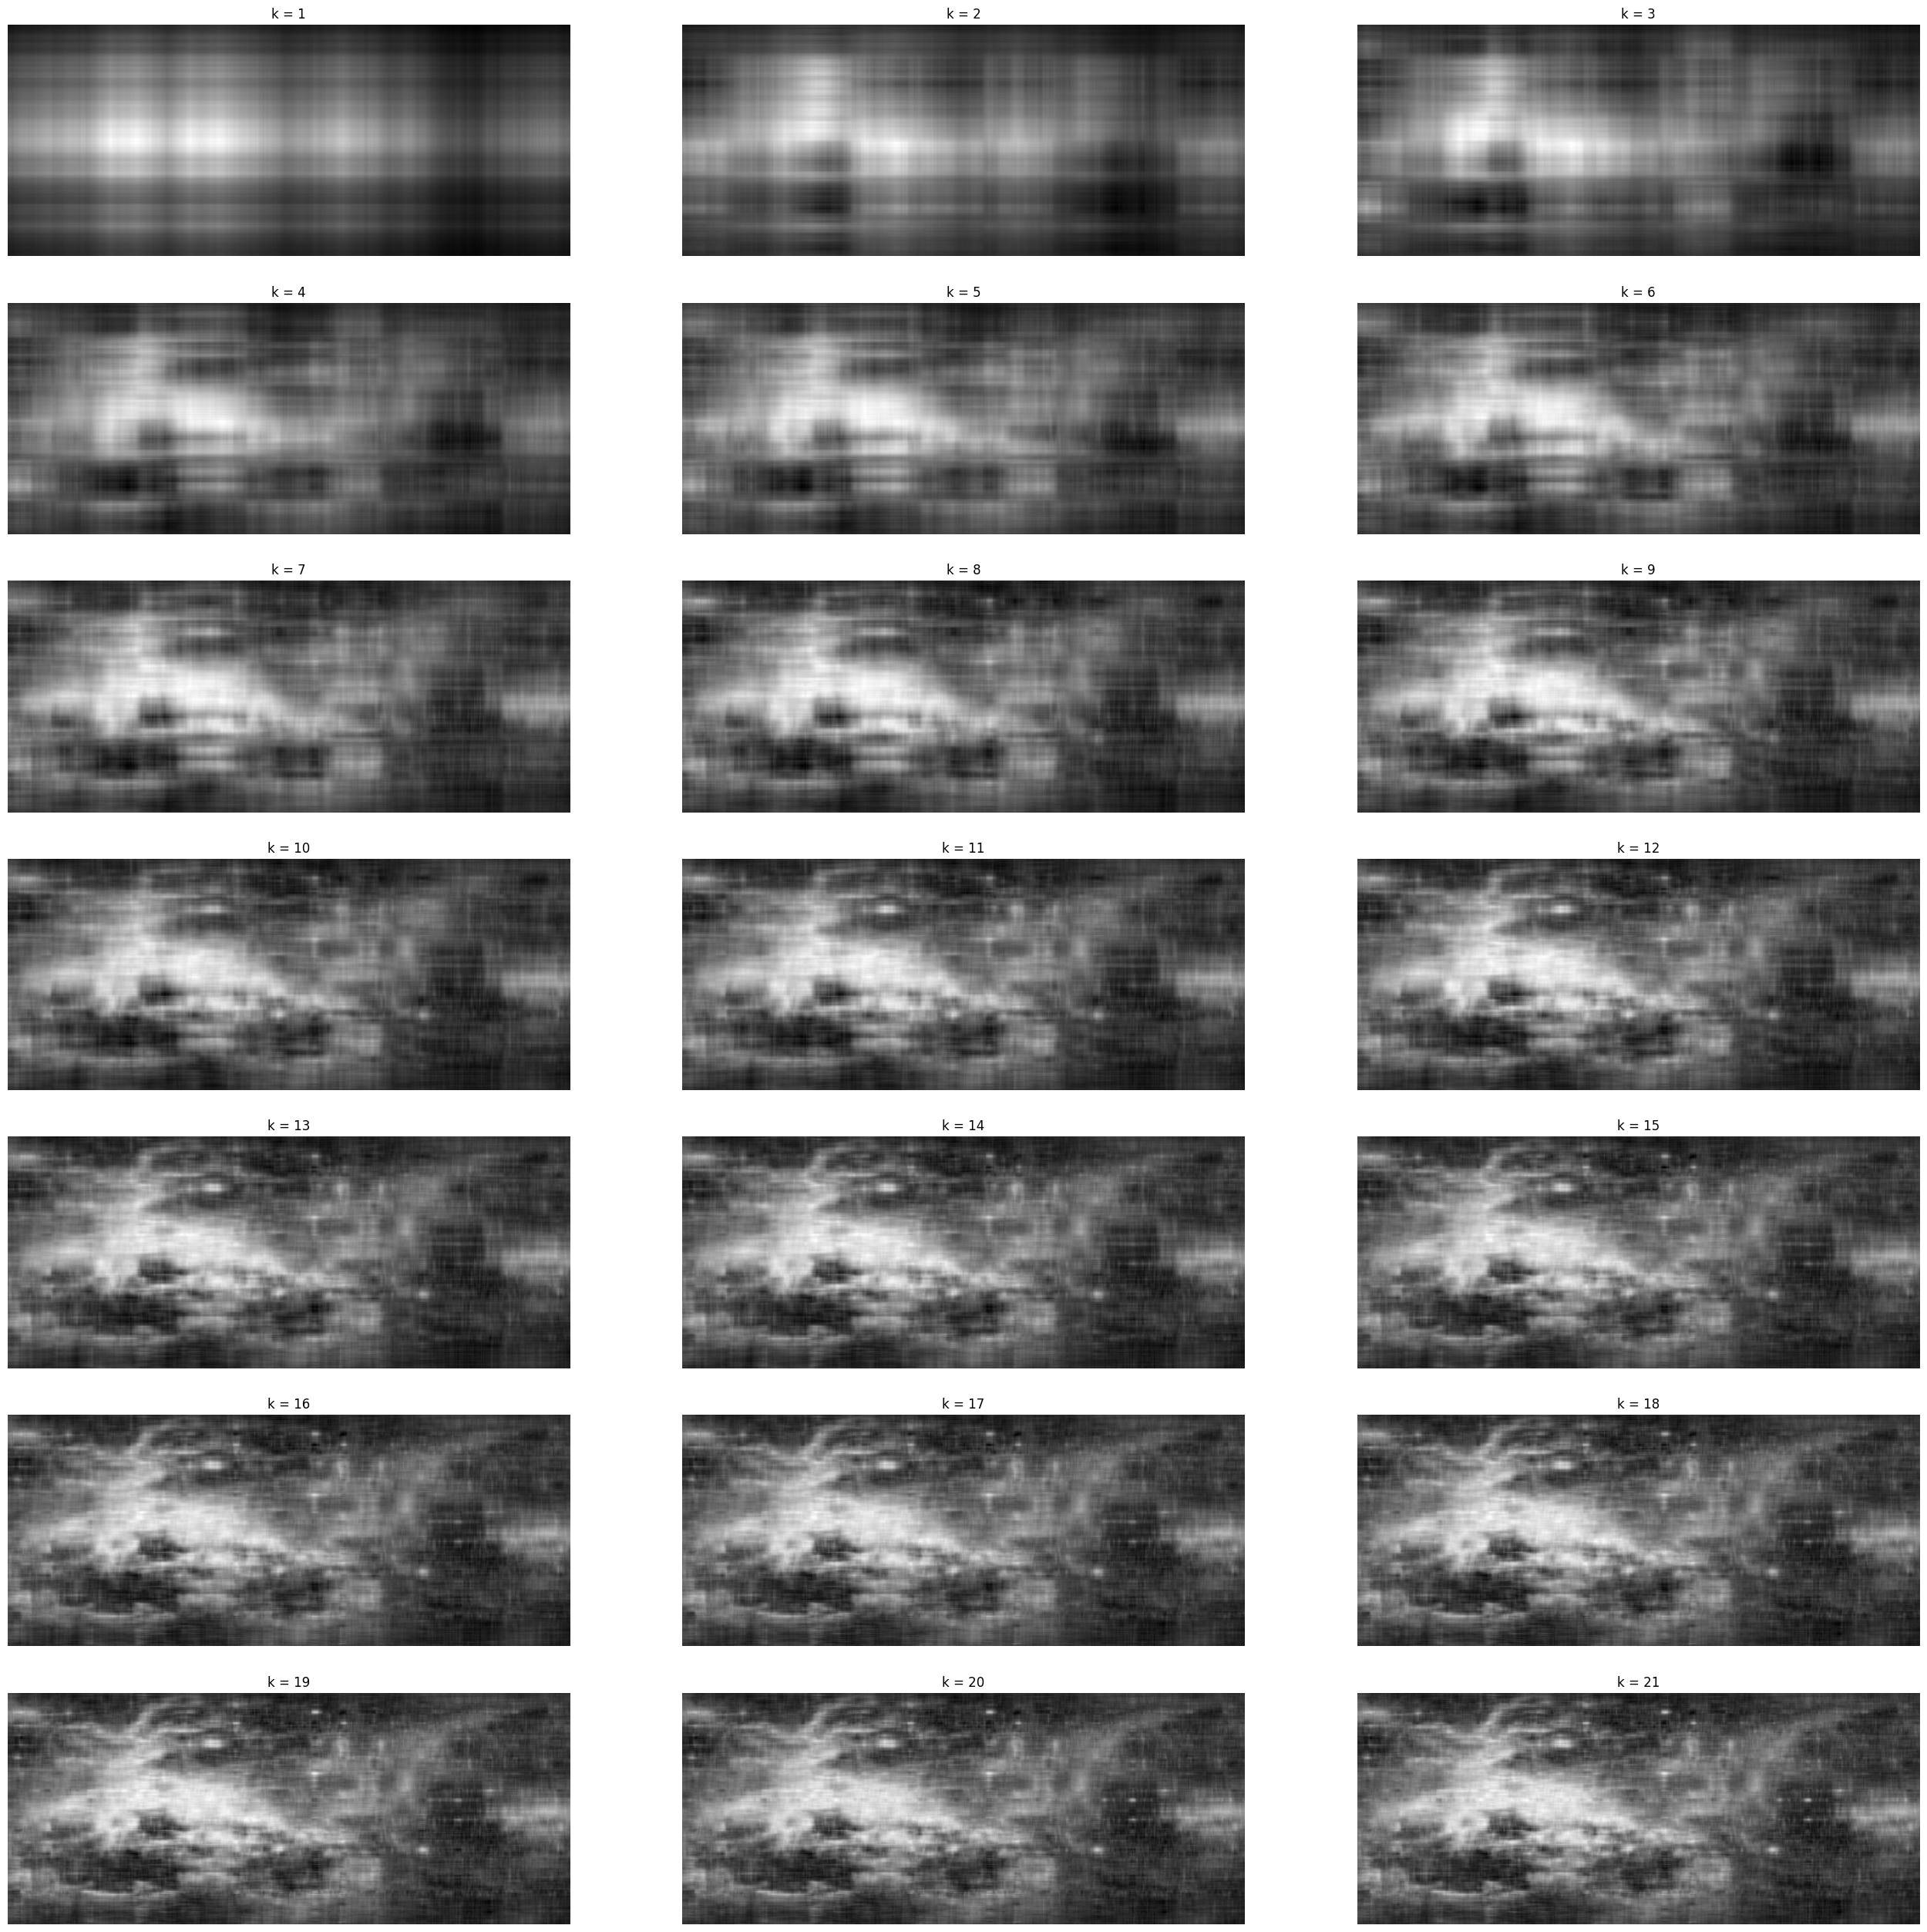

In [29]:
# Numero di valori singolari da considerare
x = range(21)

# Creazione di una griglia di subplot con 2 righe e 3 colonne
# e specifica delle dimensioni della figura
fig, axs = plt.subplots(7, 3, figsize=(32, 32))

# Appiattimento della matrice di assi per semplificare l'iterazione
axs = axs.flatten() #perché era un array di 2 dimensioni e noi si trasforma in una dimensione

Xk = np.zeros((U.shape[0], VT.shape[1]))
plt.set_cmap('gray')  # Impostazione della mappa dei colori in scala di grigi
# Iterazione su ogni indice specificato
for i in x:
    if i < len(s):  # Controlliamo che i non ecceda il numero di valori singolari disponibili
        # Calcoliamo il contributo della k-esima matrice di rango 1
        Xk += s[i] * np.outer(U[:, i], VT[i, :])
        
        # Visualizziamo l'immagine ricostruita cumulativa
        axs[i].imshow(Xk, aspect='auto')
        axs[i].set_title('k = %d' % (i + 1))  # Impostiamo il titolo del subplot
        axs[i].axis('off')  # Rimuoviamo gli assi


# Visualizzazione della figura
plt.show()

## Randomized SVD

Implement now a function that computes the randomized SVD of rank $k$ of a generic matrix $A$.

In [31]:
def randomized_SVD(A, k):
  m,n = A.shape
  Omega = np.random.randn(n,k)
  Z = A @ Omega
  Q,R = np.linalg.qr(Z)
  Y = Q.T @ A
  Uy, s, VT = np.linalg.svd(Y, full_matrices=False)
  U = Q @ Uy
  return U, s, VT

Set $k=100$ and compute the randomized SVD of the picture used above.

(-0.5, 629.5, 566.5, -0.5)

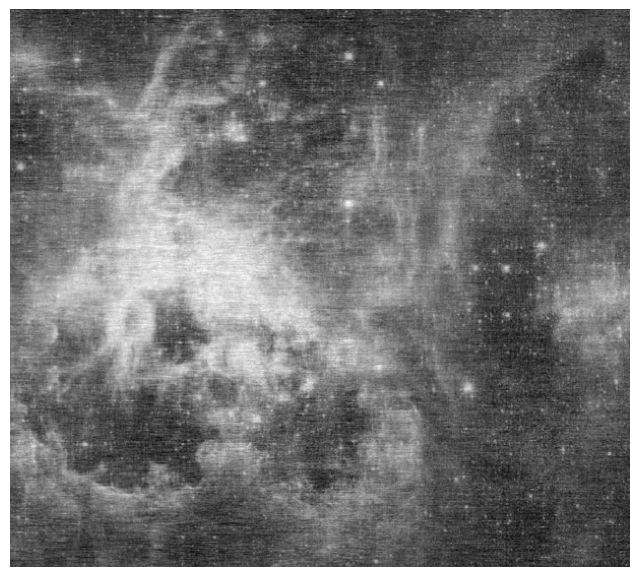

In [42]:
k=100
Ur, sr, VTr = randomized_SVD(X,k)
plt.imshow(Ur @ np.diag(sr) @ VTr)
plt.axis('off')

Plot the approximate singular values, their cumulate values and their cumulate squares, with a comparison of the ones obtained with the "exact" (i.e. non randomized) SVD.

Text(0.5, 1.0, 'explained variance')

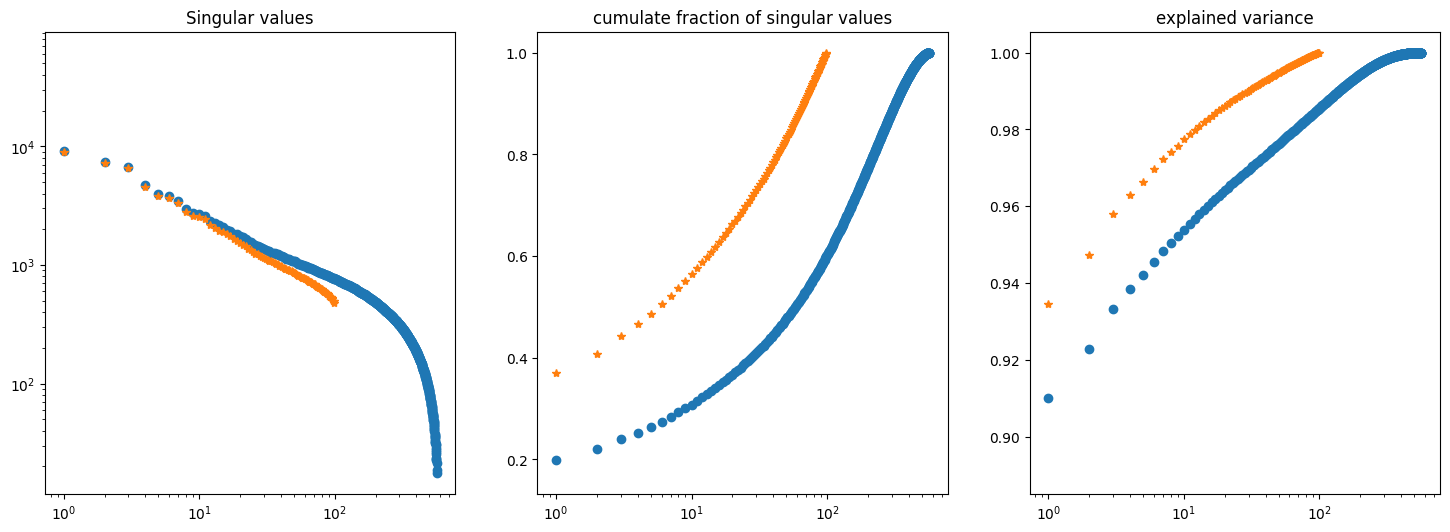

In [43]:
fig,axs = plt.subplots(1,3,figsize = (18,6))
 
# singular values
axs[0].loglog(s,'o')
axs[0].loglog(sr,'*')
axs[0].set_title("Singular values")

# cumulative fraction of singular values
axs[1].set_title("cumulate fraction of singular values")
axs[1].semilogx(np.cumsum(s) / np.sum(s),'o')
axs[1].semilogx(np.cumsum(sr) / np.sum(sr),'*')

# explained variance
axs[2].semilogx(np.cumsum(s**2) / np.sum(s**2),'o')
axs[2].semilogx(np.cumsum(sr**2) / np.sum(sr**2),'*')
axs[2].set_title("explained variance")

Compare the original picture with the best rank-$k$ matrix obtained through SVD and the best rank-$k$ matrix obtained through randomized SVD.

(-0.5, 629.5, 566.5, -0.5)

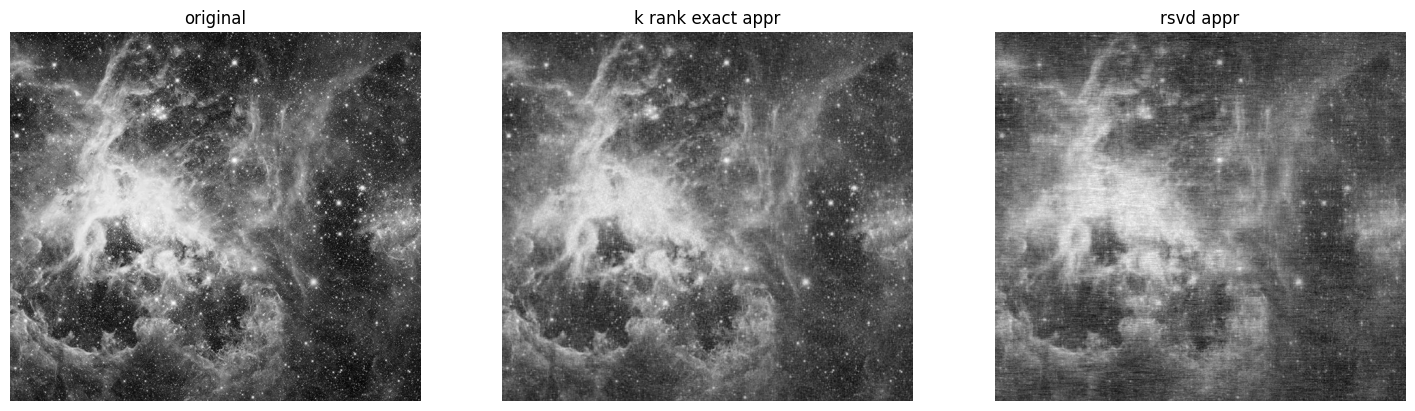

In [45]:
fig,axs = plt.subplots(1,3,figsize = (18,6))
plt.axis('off')
axs[0].imshow(X)
axs[0].set_title('original')
axs[0].axis('off')

axs[1].imshow(U[:,:k] @ np.diag(s[:k]) @ VT[:k,:])
axs[1].set_title('k rank exact appr')
axs[1].axis('off')


axs[2].imshow(Ur @ np.diag(sr) @ VTr)
axs[2].set_title('rsvd appr')
axs[2].axis('off')



